# Combinacions d'herois i encanteris
Aquest NoteBook és dividirà en dos apartats i un final per vuere les combinacions entre ells.

- Herois 
- Encanteris
- Tot junt

In [51]:
# Importar llibreries necessàries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Dades_Individuals import *
from Combinacions_herois_i_encanteris import *


In [ ]:
DataSet = pd.read_csv("../LOL - Dataset/games.csv")
DataSet_champions = pd.DataFrame(pd.read_json("../LOL - Dataset/champion_info_2.json"))

# Primer mirem quines són totalment identiques
duplicated_rows = DataSet[DataSet.duplicated(keep=False)]
num_duplicated_rows = len(duplicated_rows)

# Si n'hi ha, les eliminem
DataSet_cleaned = DataSet.drop_duplicates()
DataSet_cleaned

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


Per poder visualitzar de manera més clara totes les columne que necessitem podem eliminar aquelles que, en aquest moment, no anem a utilitzar.

In [53]:
columnes_a_eliminar = [
    'creationTime', 'gameDuration', 'seasonId'
]

DataSet_herois = DataSet_cleaned.drop(columnes_a_eliminar, axis=1)
print(f"Columnes eliminades correctament")
print(f"Columnes restants: {list(DataSet_herois.columns)}")
print(f"Dimensions del dataset: {DataSet_herois.shape}")
DataSet_herois.head(5)

Columnes eliminades correctament
Columnes restants: ['gameId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']
Dimensions del dataset:

,gameId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1,2,1,1,1,1,2,8,12,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1,1,1,1,0,1,1,119,7,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1,2,1,1,1,2,0,18,4,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1,1,1,1,1,1,0,57,4,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1,2,1,1,1,1,0,19,4,...,3,0,0,1,0,86,11,201,122,18


## Preparació dades
Comencem utilitzant la funció **comptar_combinacions_equip**, la qual ens ajuda a codificar les diferents combinacions d'herois per equip, d'aquesta manera és molt més facil jugar amb les dades. També de la funció **comptar_combinacions_encanteris** pels encanteris utilitzats pels herois.

In [54]:
# Retorna un diccionari per poder descodificar les combinacions d'equips
combinacions_equip = comptar_combinacions_equip(DataSet_cleaned)

# Creem un nou DataFrame amb els index de les combinacions d'equips 1 i 2 
combinacions_equip_list = list(combinacions_equip.keys())
combinacions_equips_df = pd.DataFrame(combinacions_equip_list, columns=['champ1_id', 'champ2_id', 'champ3_id', 'champ4_id', 'champ5_id'])
combinacions_equips_df

,champ1_id,champ2_id,champ3_id,champ4_id,champ5_id
0,104,122,238,412,498
1,8,11,96,112,432
2,10,35,39,76,119
3,25,54,92,120,157
4,22,24,69,126,412
...,...,...,...,...,...
101444,1,33,43,99,119
101445,11,21,25,30,56
101446,99,121,201,236,420
101447,1,89,113,164,202


In [55]:
# Executar la funció amb mode verbose per veure què detecta
combinacions_encanteris = comptar_combinacions_encanteris(DataSet_cleaned, verbose=True)

combinacions_encanteris_list = list(combinacions_encanteris.keys())
combinacions_encanteris_df = pd.DataFrame(combinacions_encanteris_list, columns=['sum1', 'sum2'])
combinacions_encanteris_df.head(5)

Detectades 10 campeons amb encanteris.
  t1, campeó 1: {'1': 't1_champ1_sum1', '2': 't1_champ1_sum2'}
  t1, campeó 2: {'1': 't1_champ2_sum1', '2': 't1_champ2_sum2'}
  t1, campeó 3: {'1': 't1_champ3_sum1', '2': 't1_champ3_sum2'}
  t1, campeó 4: {'1': 't1_champ4_sum1', '2': 't1_champ4_sum2'}
  t1, campeó 5: {'1': 't1_champ5_sum1', '2': 't1_champ5_sum2'}
Total de combinacions úniques trobades: 36
Total de combinacions úniques trobades: 36


,sum1,sum2
0,3,4
1,6,11
2,4,6
3,4,12
4,4,14


In [56]:
# Primer, assegura't que tens les combinacions d'encanteris amb índex
combinacions_encanteris_df['spell_index'] = range(len(combinacions_encanteris_df))

# Aplicar la funció completa
DataSet_reduit = afegir_totes_combinacions_a_dataset(
    df=DataSet_herois,
    combinacions_equips_df=combinacions_equips_df,
    combinacions_encanteris_df=combinacions_encanteris_df
)

print(f"Dimensions del dataset reduït: {DataSet_reduit.shape}")
print(f"Columnes reduïdes: {list(DataSet_reduit.columns)}")

Dimensions del dataset reduït: (51053, 40)
Columnes reduïdes: ['gameId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5', 'team1_comb_index', 'team2_comb_index', 't1_champ1_spell_index', 't1_champ2_spell_index', 't1_champ3_spell_index', 't1_champ4_spell_index', 't1_champ5_spell_index', 't2_champ1_spell_index', 't2_champ2_spell_index', 't2_champ3_spell_index', 't2_champ4_spell_index', 't2_champ5_spell_index']


In [57]:
# Mostrar les primeres files
DataSet_reduit.head()

,gameId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,...,t1_champ1_spell_index,t1_champ2_spell_index,t1_champ3_spell_index,t1_champ4_spell_index,t1_champ5_spell_index,t2_champ1_spell_index,t2_champ2_spell_index,t2_champ3_spell_index,t2_champ4_spell_index,t2_champ5_spell_index
0,3326086514,1,2,1,1,1,1,2,11,1,...,3,0,6,1,4,5,6,2,4,0
1,3229566029,1,1,1,1,0,1,1,10,4,...,6,3,0,4,5,3,4,5,4,6
2,3327363504,1,2,1,1,1,2,0,8,1,...,6,5,0,3,3,6,4,3,5,6
3,3326856598,1,1,1,1,1,1,0,9,2,...,3,4,6,7,5,4,5,0,4,6
4,3330080762,1,2,1,1,1,1,0,9,2,...,3,5,0,6,6,0,3,5,3,6


## Herois
Visualitzem les dades dels herois a continaució.

Primer mirem quins són les combinacions d'herois que més partides han guanyat, primer per l'equip 1.

In [58]:
# Obtenim les dades on l'equip 1 ha guanyat
DataSet_herois_1 = DataSet_reduit[DataSet_reduit['winner'] == 1]
count = DataSet_herois_1['team1_comb_index'].value_counts()

max = count.max()
min = count.min()

print(f"El nombre màxim de combinacions d'herois que ha guanyat un equip és: {max}")
print(f"El nombre mínim de combinacions d'herois que ha guanyat un equip és: {min}")

El nombre màxim de combinacions d'herois que ha guanyat un equip és: 2
El nombre mínim de combinacions d'herois que ha guanyat un equip és: 1


ANÀLISI: INFLUÈNCIA DE LES COMBINACIONS D'HEROIS EN LES VICTÒRIES

Top 15 combinacions d'herois (Equip 1):

Combo Idx    Partides     Victòries    Derrotes     Taxa Victòria  
-----------------------------------------------------------------
39439        2            2            0            100.00%
2034         2            1            1             50.00%
38679        2            1            1             50.00%
16748        2            1            1             50.00%
2055         2            1            1             50.00%
1304         2            1            1             50.00%
5824         2            1            1             50.00%
17070        2            1            1             50.00%
16091        2            0            2              0.00%
11839        3            0            3              0.00%
34603        2            0            2              0.00%
4923         2            0            2              0.00%
11741        2            0           

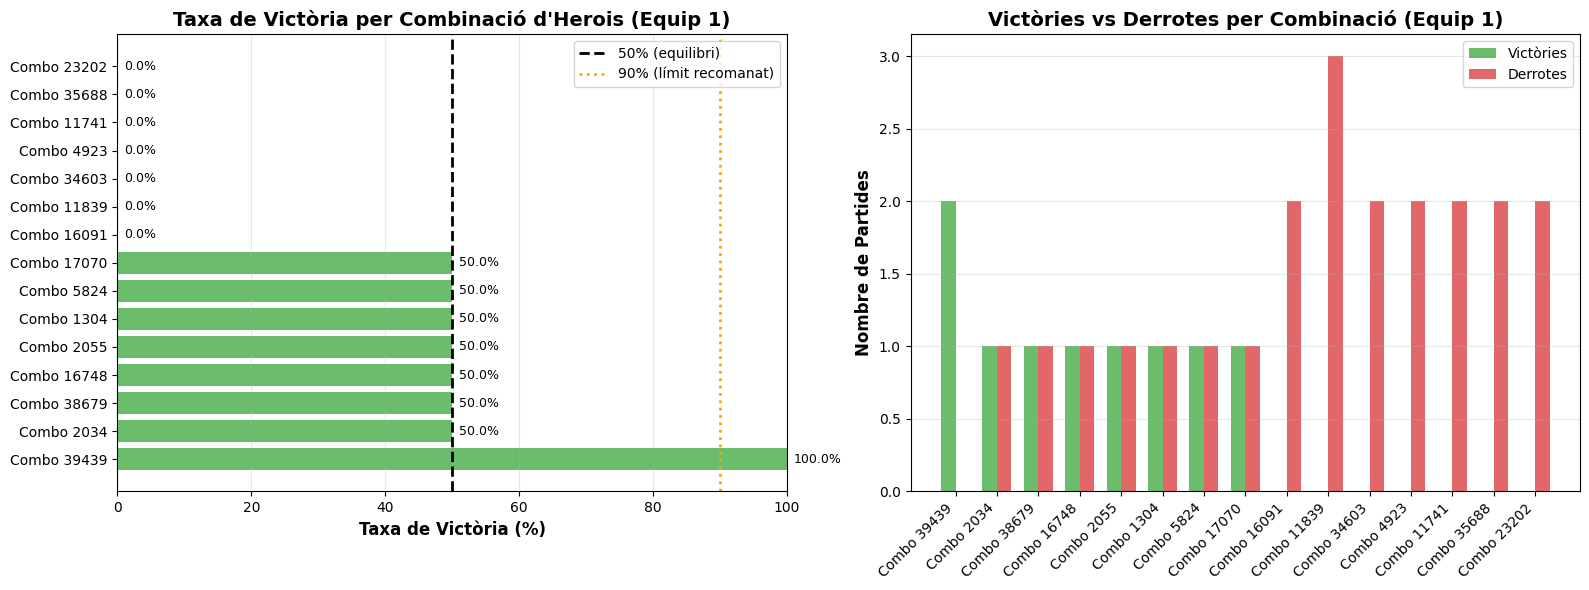


ESTADÍSTIQUES GLOBALS:
Taxa de victòria global de l'equip 1: 50.65%
Combinació amb taxa més alta: Combo 39439 (100.00%)
Combinació amb taxa més baixa: Combo 23202 (0.00%)

✓ COMBINACIONS AMB TAXA >= 90%:
  Índexs: [39439]
  Total: 1 combinacions
    - Combo 39439: 100.00% (2/2 victòries)


In [ ]:
combos_recomanats = crear_grafica_i_analisi_de_combinacions_guanyades(DataSet_reduit, 'team1_comb_index', 1)

In [ ]:
# Obtenir les dades dels herois recomanats en format DataFrame
print("="*80)
print("DADES DELS HEROIS A LES COMBINACIONS RECOMANADES")
print("="*80)

herois_recomanats_data = obtenir_dades_herois_recomanats(combos_recomanats, combinacions_equips_df)

# Crear el DataFrame
df_herois_recomanats = pd.DataFrame(herois_recomanats_data)

print("\nDataFrame amb els herois de les combinacions recomanades:")
print("="*80)
print(df_herois_recomanats.to_string(index=False))
print("="*80)

# Mostrar estadístiques
print(f"\nTotal de combinacions: {df_herois_recomanats['combo_idx'].nunique()}")
print(f"Total de herois únics: {df_herois_recomanats['heroi_id'].nunique()}")

df_herois_recomanats

DADES DELS HEROIS A LES COMBINACIONS RECOMANADES
Total de herois carregats: 139


DataFrame amb els herois de les combinacions recomanades:
 combo_idx  posicio  heroi_id      nom      key                     titol               tags
     39439        1        12  Alistar  Alistar              the Minotaur      Tank, Support
     39439        2        18 Tristana Tristana         the Yordle Gunner Marksman, Assassin
     39439        3        19  Warwick  Warwick the Uncaged Wrath of Zaun      Fighter, Tank
     39439        4        20     Nunu     Nunu            the Yeti Rider   Support, Fighter
     39439        5        61  Orianna  Orianna     the Lady of Clockwork      Mage, Support

Total de combinacions: 1
Total de herois únics: 5


,combo_idx,posicio,heroi_id,nom,key,titol,tags
0,39439,1,12,Alistar,Alistar,the Minotaur,"Tank, Support"
1,39439,2,18,Tristana,Tristana,the Yordle Gunner,"Marksman, Assassin"
2,39439,3,19,Warwick,Warwick,the Uncaged Wrath of Zaun,"Fighter, Tank"
3,39439,4,20,Nunu,Nunu,the Yeti Rider,"Support, Fighter"
4,39439,5,61,Orianna,Orianna,the Lady of Clockwork,"Mage, Support"


In [ ]:
# Obtenim les dades on l'equip 2 ha guanyat
DataSet_herois_2 = DataSet_reduit[DataSet_reduit['winner'] == 2]
count = DataSet_herois_2['team2_comb_index'].value_counts()

max = count.max()
min = count.min()

print(f"El nombre màxim de combinacions d'herois que ha guanyat un equip és: {max}")
print(f"El nombre mínim de combinacions d'herois que ha guanyat un equip és: {min}")

In [ ]:
combos_recomanats = crear_grafica_i_analisi_de_combinacions_guanyades(DataSet_reduit, 'team2_comb_index', 2)

In [ ]:
# Obtenir les dades dels herois recomanats en format DataFrame
print("="*80)
print("DADES DELS HEROIS A LES COMBINACIONS RECOMANADES")
print("="*80)

herois_recomanats_data = obtenir_dades_herois_recomanats(combos_recomanats, combinacions_equips_df)

# Crear el DataFrame
df_herois_recomanats = pd.DataFrame(herois_recomanats_data)

print("\nDataFrame amb els herois de les combinacions recomanades:")
print("="*80)
print(df_herois_recomanats.to_string(index=False))
print("="*80)

# Mostrar estadístiques
print(f"\nTotal de combinacions: {df_herois_recomanats['combo_idx'].nunique()}")
print(f"Total de herois únics: {df_herois_recomanats['heroi_id'].nunique()}")

df_herois_recomanats

Com podem observar en la gràfica, el combo d'herois que té un index de vitoria més gran és el 39439, que és:
